In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [ ]:
# donwload dataset https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health

In [2]:
df = pd.read_csv('Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [3]:
df.drop('Unnamed: 0' , axis = 1,inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [5]:
df.nunique()

statement    51073
status           7
dtype: int64

In [6]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [7]:
df['statement'] = df['statement'].fillna('')

In [8]:
df.isnull().sum()

statement    0
status       0
dtype: int64

In [9]:
classes = df['status'].unique()
classes

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [10]:
df['status'].value_counts()

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

In [11]:
hist = px.histogram(df, x ='status', title='Distribution of Mental Health Status')
hist.show()
#Visualisasi data status melalui histogram

In [12]:
import nltk
# nltk.download('punkt_tab')
# nltk.download('stopwords')

In [13]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    word_list = word_tokenize(text)
    # Remove stopwords
    eng_stopwords = stopwords.words('english')
    word_list = [word for word in word_list if word not in eng_stopwords]
    # Stemming
    stemmer = SnowballStemmer('english')
    word_list = [stemmer.stem(word) for word in word_list]
    # Join words back to a single string
    return ' '.join(word_list)

In [14]:
df['statement'] = df['statement'].apply(preprocess_text)

In [15]:
df.head()

,statement,status
0,oh gosh,Anxiety
1,"troubl sleep , confus mind , restless heart . ...",Anxiety
2,"wrong , back dear , forward doubt . stay restl...",Anxiety
3,ve shift focus someth els 'm still worri,Anxiety
4,"'m restless restless , 's month , boy . mean ?",Anxiety


In [16]:
import numpy as np
def transform_class(class_name):
    a = np.zeros(len(classes))
    a[classes == class_name] = 1
    return a

def rev_transform_class(class_arr):
    return classes[class_arr.argmax()]

print(transform_class('Normal'))
print(rev_transform_class(np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])))
#Mengubah data status menjadi one hot encoding

[0. 1. 0. 0. 0. 0. 0.]
Anxiety


In [17]:
X = df['statement'].values
y = np.array([transform_class(status) for status in df['status']])
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
print(len(X_train), len(Y_train), len(X_test), len(Y_test))
# Melakukan Splitting Data

42434 42434 10609 10609


In [18]:
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [19]:
tokenizer = Tokenizer(oov_token='UNK', lower=True, num_words= 10000)
tokenizer.fit_on_texts(X_train)
# Melakukan Tokenisasi Data Teks

In [20]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
#Mengonversi teks menjadi urutan token

In [21]:
max_len = 400
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
#Padding urutan

In [22]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

41663

In [23]:
embedding_size = 64
num_hidden = 64

In [24]:
# model = Sequential()
# model.add(Embedding(input_dim = 10000, output_dim=200, input_shape=(200, )))
# model.add(Bidirectional(LSTM(150, dropout=0.2, recurrent_dropout=0.2)))
# model.add(Dense(7, activation= 'sigmoid'))

# model.summary()

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_size),
    Bidirectional(LSTM(num_hidden, return_sequences=False)),
    Dense(len(classes), activation='softmax')
])

model.summary()

# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length = 42))
# model.add(Dropout(0.25))

# model.add(Conv1D(64, 5,padding = 'valid',activation = 'relu',strides = 1))
# # model.add(Dropout(0.25))

# model.add(MaxPooling1D(pool_size = 4))
# model.add(LSTM(200))
# model.add(Flatten())
# model.add(Dense(4,activation = 'softmax'))
# model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.build((None , 42))
# model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
# from tensorflow.keras.utils import to_categorical

# # Mengonversi label ke dalam format one-hot
# y_train_one_hot = to_categorical(Y_train, num_classes=7) 
# y_test_one_hot = to_categorical(Y_test, num_classes=7)

history = model.fit(X_train_pad, Y_train, 
                    epochs=5, 
                    batch_size=64,
                    validation_data=(X_test_pad, Y_test))

Epoch 1/5
664/664 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.5271 - loss: 0.2876

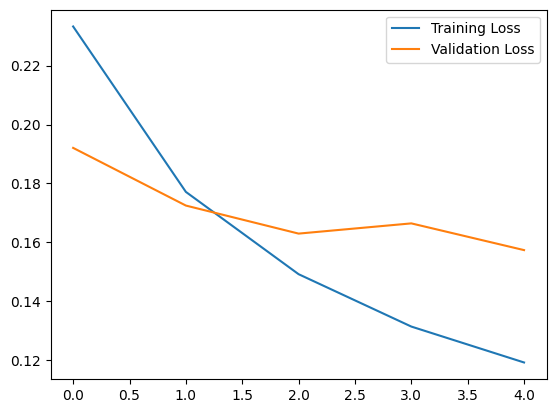

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

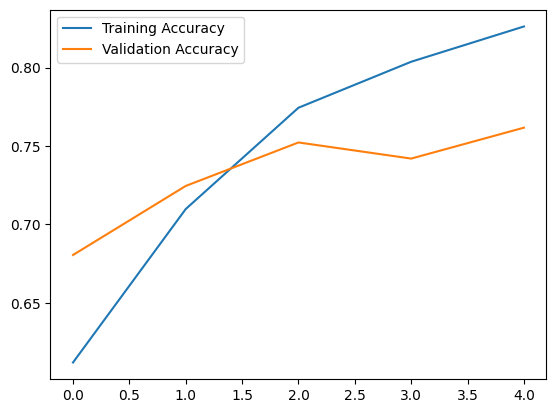

In [39]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

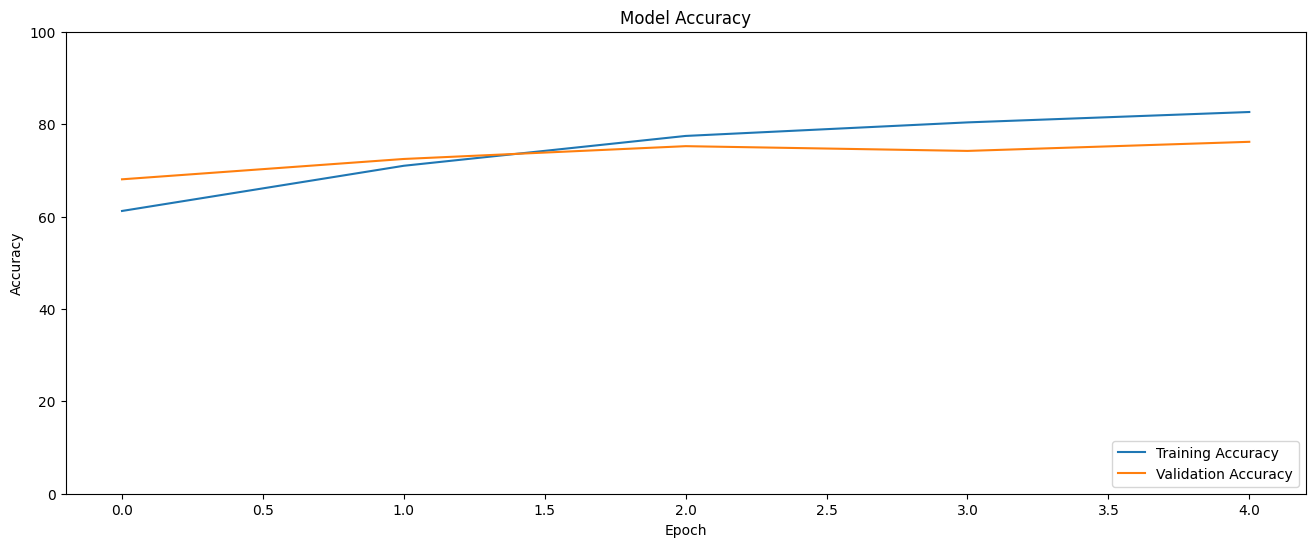

In [40]:
metrics = history.history
plt.figure(figsize=(16, 6))
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.ylim([0, 100])
plt.show()

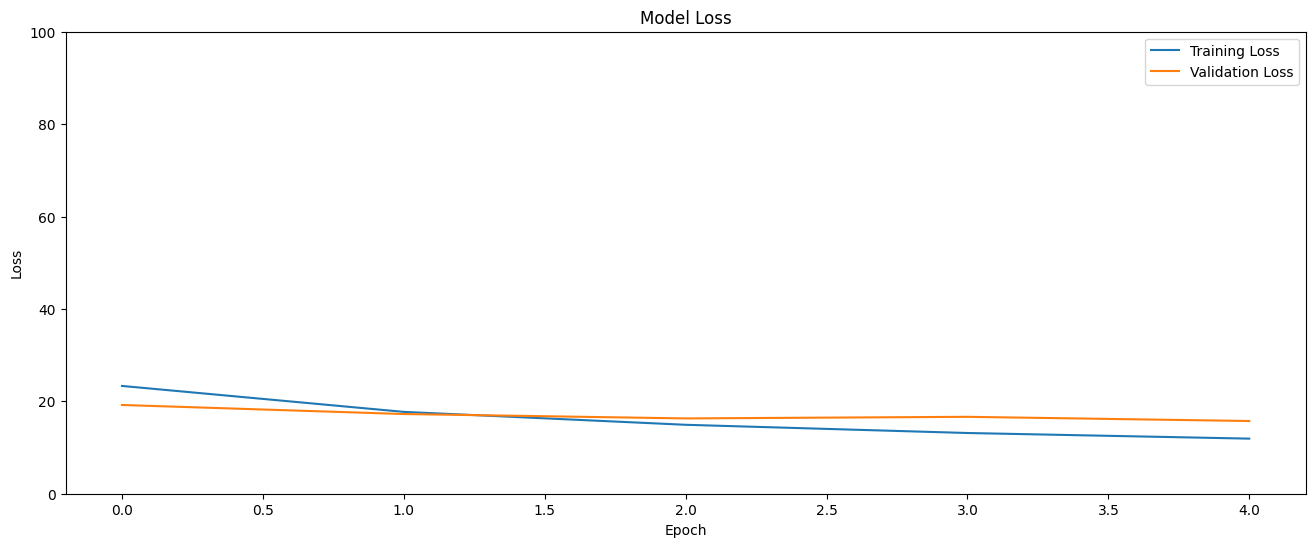

In [41]:
plt.figure(figsize=(16, 6))
plt.plot(history.epoch, 100*np.array(metrics['loss']), 100*np.array(metrics['val_loss']))
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.ylim([0, 100])
plt.show()

In [43]:
def predict_sentiment(text):
    processed_text = preprocess_text(text)  # Apply preprocessing
    seq = tokenizer.texts_to_sequences([processed_text])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)
    return classes[np.argmax(pred)]

In [44]:
print(predict_sentiment('I feel very stressed from a few days everyone hates me I have not been happy from over a month'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Depression


In [46]:
print(predict_sentiment("Shit, worry again, throw up again!"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Anxiety


In [52]:
print(predict_sentiment("People with breasts Through mania and medications I managed to lose so much weight I now have the smallest breasts in my life. Maybe this isn’t the place but I’m p angry about it. I lost a lost of weight, unhealthily, but like, god fuck. I also worry, maybe it’s new med, I’m gonna enter mania soon. "))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Bipolar


In [53]:
print(predict_sentiment('life is going perfect'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Normal


In [56]:
# import joblib

# # Simpan model setelah pelatihan
# joblib.dump(model, 'sentiment_model.joblib')
# Simpan model Keras
model.save('sentiment_analysis_model.h5')


In [57]:
import pickle

# Simpan tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)